#### Importing Important Libraries 

In [37]:
import pandas as pd
import os
from pandas.compat import StringIO
from datetime import datetime
import matplotlib.pyplot as plt

#### Reading monthly sales dataset seperatly and concat to all_monthly_data

In [29]:
#df = pd.read_csv('salesdata/Sales_April_2019.csv')
files = [file for file in os.listdir('salesdata/') ]
#print(files)
df_all = pd.DataFrame()
for file in files:
         df = pd.read_csv("salesdata/" + file)
         df_all = pd.concat([df_all, df])

#df_all.to_csv('all_month.csv', index = False)

#### Reading Final dataset and droping null NaN values

In [32]:
all_data = pd.read_csv('all_month.csv')
all_data.isna().sum()
all_data.dropna(how='all', inplace=True)

In [33]:
#### Creating Month feature from Order date and converting month data type as Integer 
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data['month'] = all_data['Order Date'].str[0:2]
all_data['month'] = all_data['month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [34]:
### Converting Quantity Ordered and Price Each as numering datatype. 
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [35]:
### Creating Extra hyper parameter as SALES 
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# What is the best month for sales? How much was earned that month?

In [8]:
all_data.groupby('month').sum()['Sales']

month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

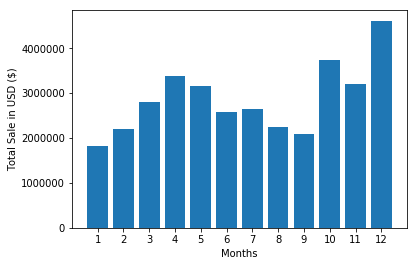

In [38]:
months = range(1,13)
result = all_data.groupby('month').sum()['Sales']
plt.bar(months, result)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Total Sale in USD ($)')
plt.show()


##### From below graph December month got a best sales month and it earned more than 4 million. 

# Which city has the Highest number of Sales

In [39]:
# Adding a city column 
all_data['City'] = all_data['Purchase Address'].apply(lambda x:x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [40]:
result = all_data.groupby('City').sum()

In [41]:
result.head()

,Quantity Ordered,Price Each,month,Sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06


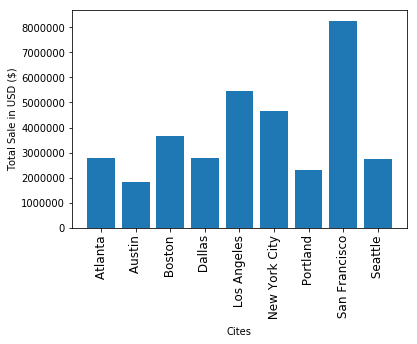

In [42]:
###City = all_data['City'].unique()
City = [city for city, df in all_data.groupby('City')]
Sales = result['Sales'] 
plt.bar(City, Sales)
plt.xticks(City, rotation = 'vertical', size =12)
plt.xlabel('Cites')
plt.ylabel('Total Sale in USD ($)')
plt.show()


##### From below graph San Francisco got the highest number of sales. 

# What time should we display advertisements to maximize likelihood of customer's buying product?

In [43]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [44]:
### converting Order Date datatype as datetime 
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [45]:
### Here we are creating Hour and minite variable
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

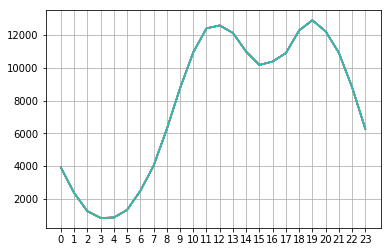

In [46]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()


##### from below chart shows 12 o clock and 7pm got maximum products sold out, so that particular time company could displayu theie advertisment

# What products are most often sold together ? 

In [47]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


In [48]:
#### Here we are grouping the Products based on the Order ID using Lambda function 
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\vinot\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
#### Droping the duplicates grouped products
df = df[['Order ID','Grouped']].drop_duplicates()
df.head(10)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [50]:
from itertools import combinations
from collections import Counter
count= Counter()
for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
  print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [ ]:
##### Above output shows iPhone and Lighting Charger cables sold most often "1005" times

# What product sold most and why do you think it sold most?

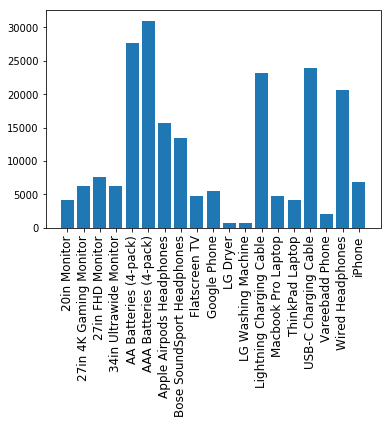

In [51]:
products = all_data.groupby('Product')
Order =products.sum()['Quantity Ordered']
product = [product for product, df in products]   
plt.bar(product,Order)
plt.xticks(product,rotation='vertical',size=12)
plt.show()

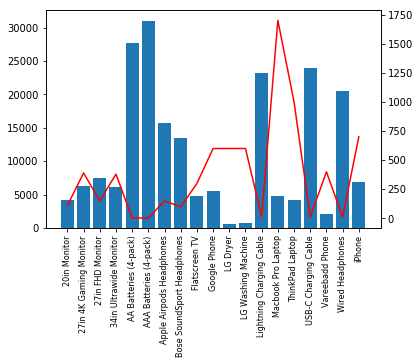

In [52]:
price = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product,Order)
ax2.plot(product,price, color ='r')
ax1.set_xticklabels(product, rotation ='vertical', size = 8)
plt.show()

In [ ]:
### From above chart shows AAA batteries sold most because it's price is low.